# Wine Not? Red Wine Quality Prediction
Michali Izhaky  
MSDS 599: Modeling II Final Project  
due 05/17/2021

![](https://www.thespruceeats.com/thmb/Fv9_8yovhCtj_HYhZXIL6jba43E=/960x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/red-wine-is-poured-into-a-glass-from-a-bottle--light-background--1153158143-98320451802c485cb6d7b5437c7fd60a.jpg)

# About the data
## Overview
This 'red wine quality' dataset was downloaded from [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) but it originally came from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). It contains 12 columns (11 features and 1 target), and 1599 rows of data from the red varieties of Portuguese "Vinho Verde" wine ([Cortez et al., 2009](https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf)). Because of privacy concerns, only physicochemical variables are available as inputs, and sensory variables are available as the output. Therefore, no data is available about wine brand, types of grapes, price of the wine, or any other identifying information.

## Variables
Input variables (based on physicochemical tests):  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  

Output variable (based on sensory data):  
12 - quality (score between 0 and 10)  

Note: the classes are ordered but not balanced, which means that there are more normal/average wines than great or poor wines.

## Research question
**Can we predict whether a wine will be good or bad based on the features listed above?**

Since this dataset can be used to answer either regression or classification questions, I chose to pursue the classification route. I chose to predict whether a wine is 'good' (quality >= 6) or 'bad' (quality < 6). This is a supervised machine learning problem, where the outputs are all known.

# About the analysis
I was trying to build a model that would utilize the eleven features given about the wines to predict whether a wine is good or bad. I started by testing a k-nearest neighbors approach, for which I scaled the data, which did not perform very well on this dataset. Then, I tried bagging and boosting, which both improved over the k-nearest neighbors algorithm. Finally, I tried a random forest classifier which seemed to work the best, with an F1 score of 0.8. I did not have to do much pre-processing of the dataset, since it was already tidy and didn't contain any ommitted values.  
I had a feeling that either a clustering or forest approach would work best with this data, since there are eleven different features, but certain values would arise more often than others in a good wine, and vice versa. Therefore, allowing the classifier to make cuts at certain thresholds for feature values would confer the best predictive model.

# About the results: insights, surprises, and future directions
In conclusion, I can build a model to predict the quality of red wines based on the features in this dataset, by utilizing the random forest approach. I found that the most important features to predict whether a wine is good or bad were alcohol level, volatile acidity, and the amount of sulfates present in the wines. However, the rest of the features still contributed to the overall predictive power of the model. I was surprised that the k-nearest neighbors approach did not do as well as I expected, since my exploratory data analysis suggested that similarly ranked wines could form clusters in feature space based on the values of the features. Since all the features seem to have some importance to inform the model, the random forest was a nice option to ensure that the weaker signals penetrate through the model. Thus, I was not surprised that the random forest did the best job answering my research question.  

For the future, I am curious to learn and apply more tweaks to the random forest model, to further increase the F1 score and the accuracy. Additionally, adding more training and test samples to the dataset will improve the accuracy of the model. I would also be interested in either building a separate model to assess white wines, or adding the white wine data to the current model and observing how the model performs. I would also like to learn about neural nets, since perhaps the white wine data could add a layer of complexity that could be solved by the addition of neuronal layers in the model.

# import packages

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from statsmodels.formula.api import ols
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import r2_score

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Exploratory Data Analysis

In [ ]:
# import dataset
path = '/content/drive/MyDrive/MSDS_599/michali_project/'
df = pd.read_csv(path + 'winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape
# we have 1599 rows of data to build our model with

(1599, 12)

In [ ]:
df.pH.value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
2.95     1
3.74     1
2.87     1
2.90     1
3.70     1
Name: pH, Length: 89, dtype: int64

In [ ]:
# check for NaN values
for col in df.columns:
  print(col)
  print(df[col].isnull().values.any())

# great! there are no NaNs in this dataset

fixed acidity
False
volatile acidity
False
citric acid
False
residual sugar
False
chlorides
False
free sulfur dioxide
False
total sulfur dioxide
False
density
False
pH
False
sulphates
False
alcohol
False
quality
False


fixed acidity
7.2     0.041901
7.1     0.035647
7.8     0.033146
7.5     0.032520
7.0     0.031270
          ...   
13.4    0.000625
14.0    0.000625
5.5     0.000625
4.6     0.000625
4.7     0.000625
Name: fixed acidity, Length: 96, dtype: float64
volatile acidity
0.600    0.029393
0.500    0.028768
0.430    0.026892
0.590    0.024390
0.360    0.023765
           ...   
1.090    0.000625
1.035    0.000625
1.580    0.000625
0.950    0.000625
0.805    0.000625
Name: volatile acidity, Length: 143, dtype: float64
citric acid
0.00    0.082552
0.49    0.042527
0.24    0.031895
0.02    0.031270
0.26    0.023765
          ...   
0.75    0.000625
0.78    0.000625
1.00    0.000625
0.62    0.000625
0.72    0.000625
Name: citric acid, Length: 80, dtype: float64
residual sugar
2.00    0.097561
2.20    0.081926
1.80    0.080675
2.10    0.080050
1.90    0.073171
          ...   
5.70    0.000625
2.85    0.000625
7.30    0.000625
8.90    0.000625
2.65    0.000625
Name: residual sugar, Length: 91, dty

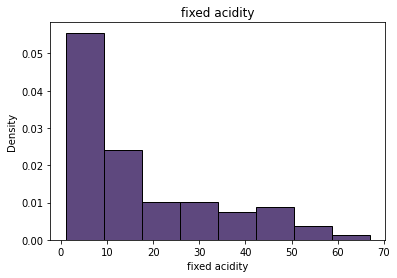

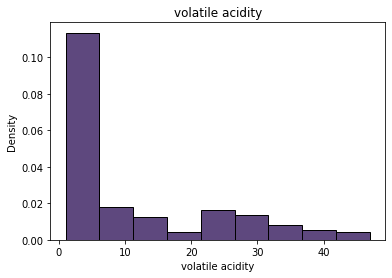

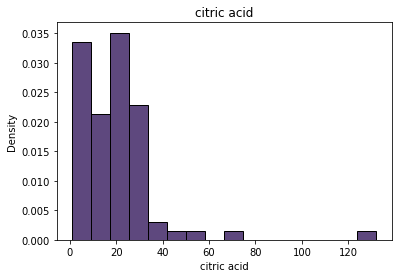

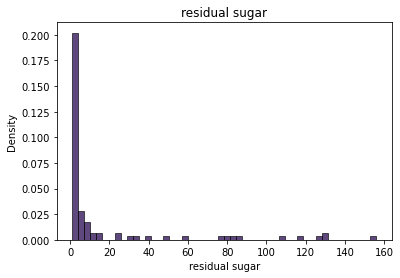

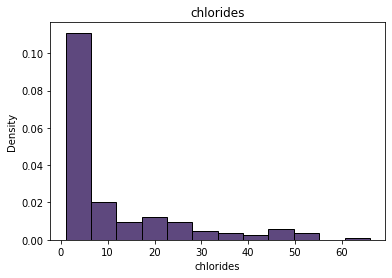

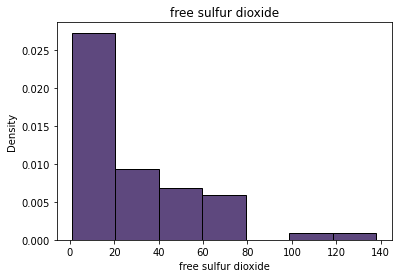

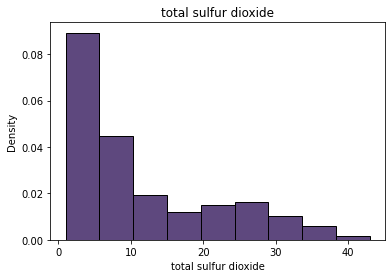

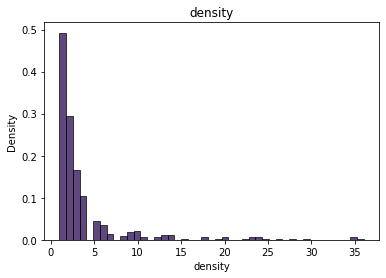

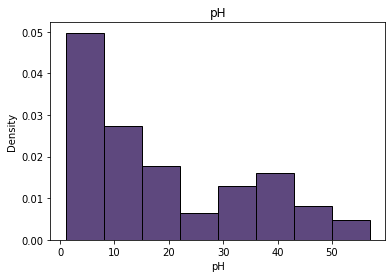

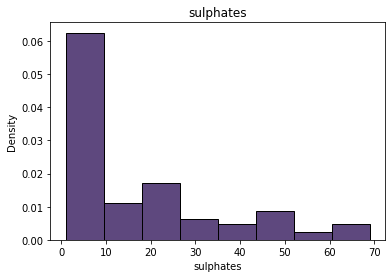

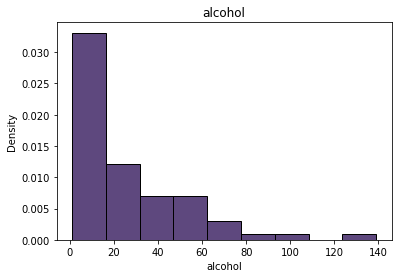

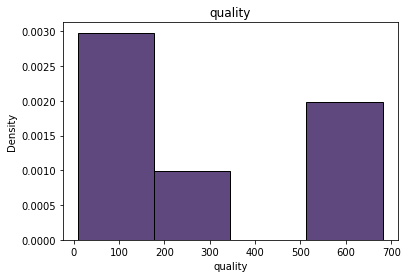

In [ ]:
# plot histograms of value counts for each column in the dataframe
# to get a sense for the range of values in each feature and the otuput variable
sns.set_palette('inferno')
for col in df.columns:
  print(col)
  print(df[col].value_counts(normalize=True))
  plt.figure()
  sns.histplot(df[col].value_counts(),
               stat = 'density')
  plt.title(col)

In [ ]:
# let's see if we can balance the output column
# to determine a good cutoff for good vs bad wines
print(df.quality.value_counts(sort=False))
print(list(df.quality.value_counts(sort=False))[3:])
# how many wines do we have rated 3-5?
print(sum(list(df.quality.value_counts(sort=False))[0:3]))
# how many wines do we have rated 6-8?
print(sum(list(df.quality.value_counts(sort=False))[3:]))
# The 'poor' vs 'good' wines are somewhat balanced if we use
# 6 as the cutoff for a 'good' wine

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64
[638, 199, 18]
744
855


## EDA: add extra target classification column, scale, and visualize the data

In [ ]:
# add the target column
df['target'] = df.quality.apply(lambda x: 0 if x<6 else 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
# assign x and y
y = df.target
print(y)
x = df.drop(['quality', 'target'], axis=1)
print(x)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: target, Length: 1599, dtype: int64
      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9          

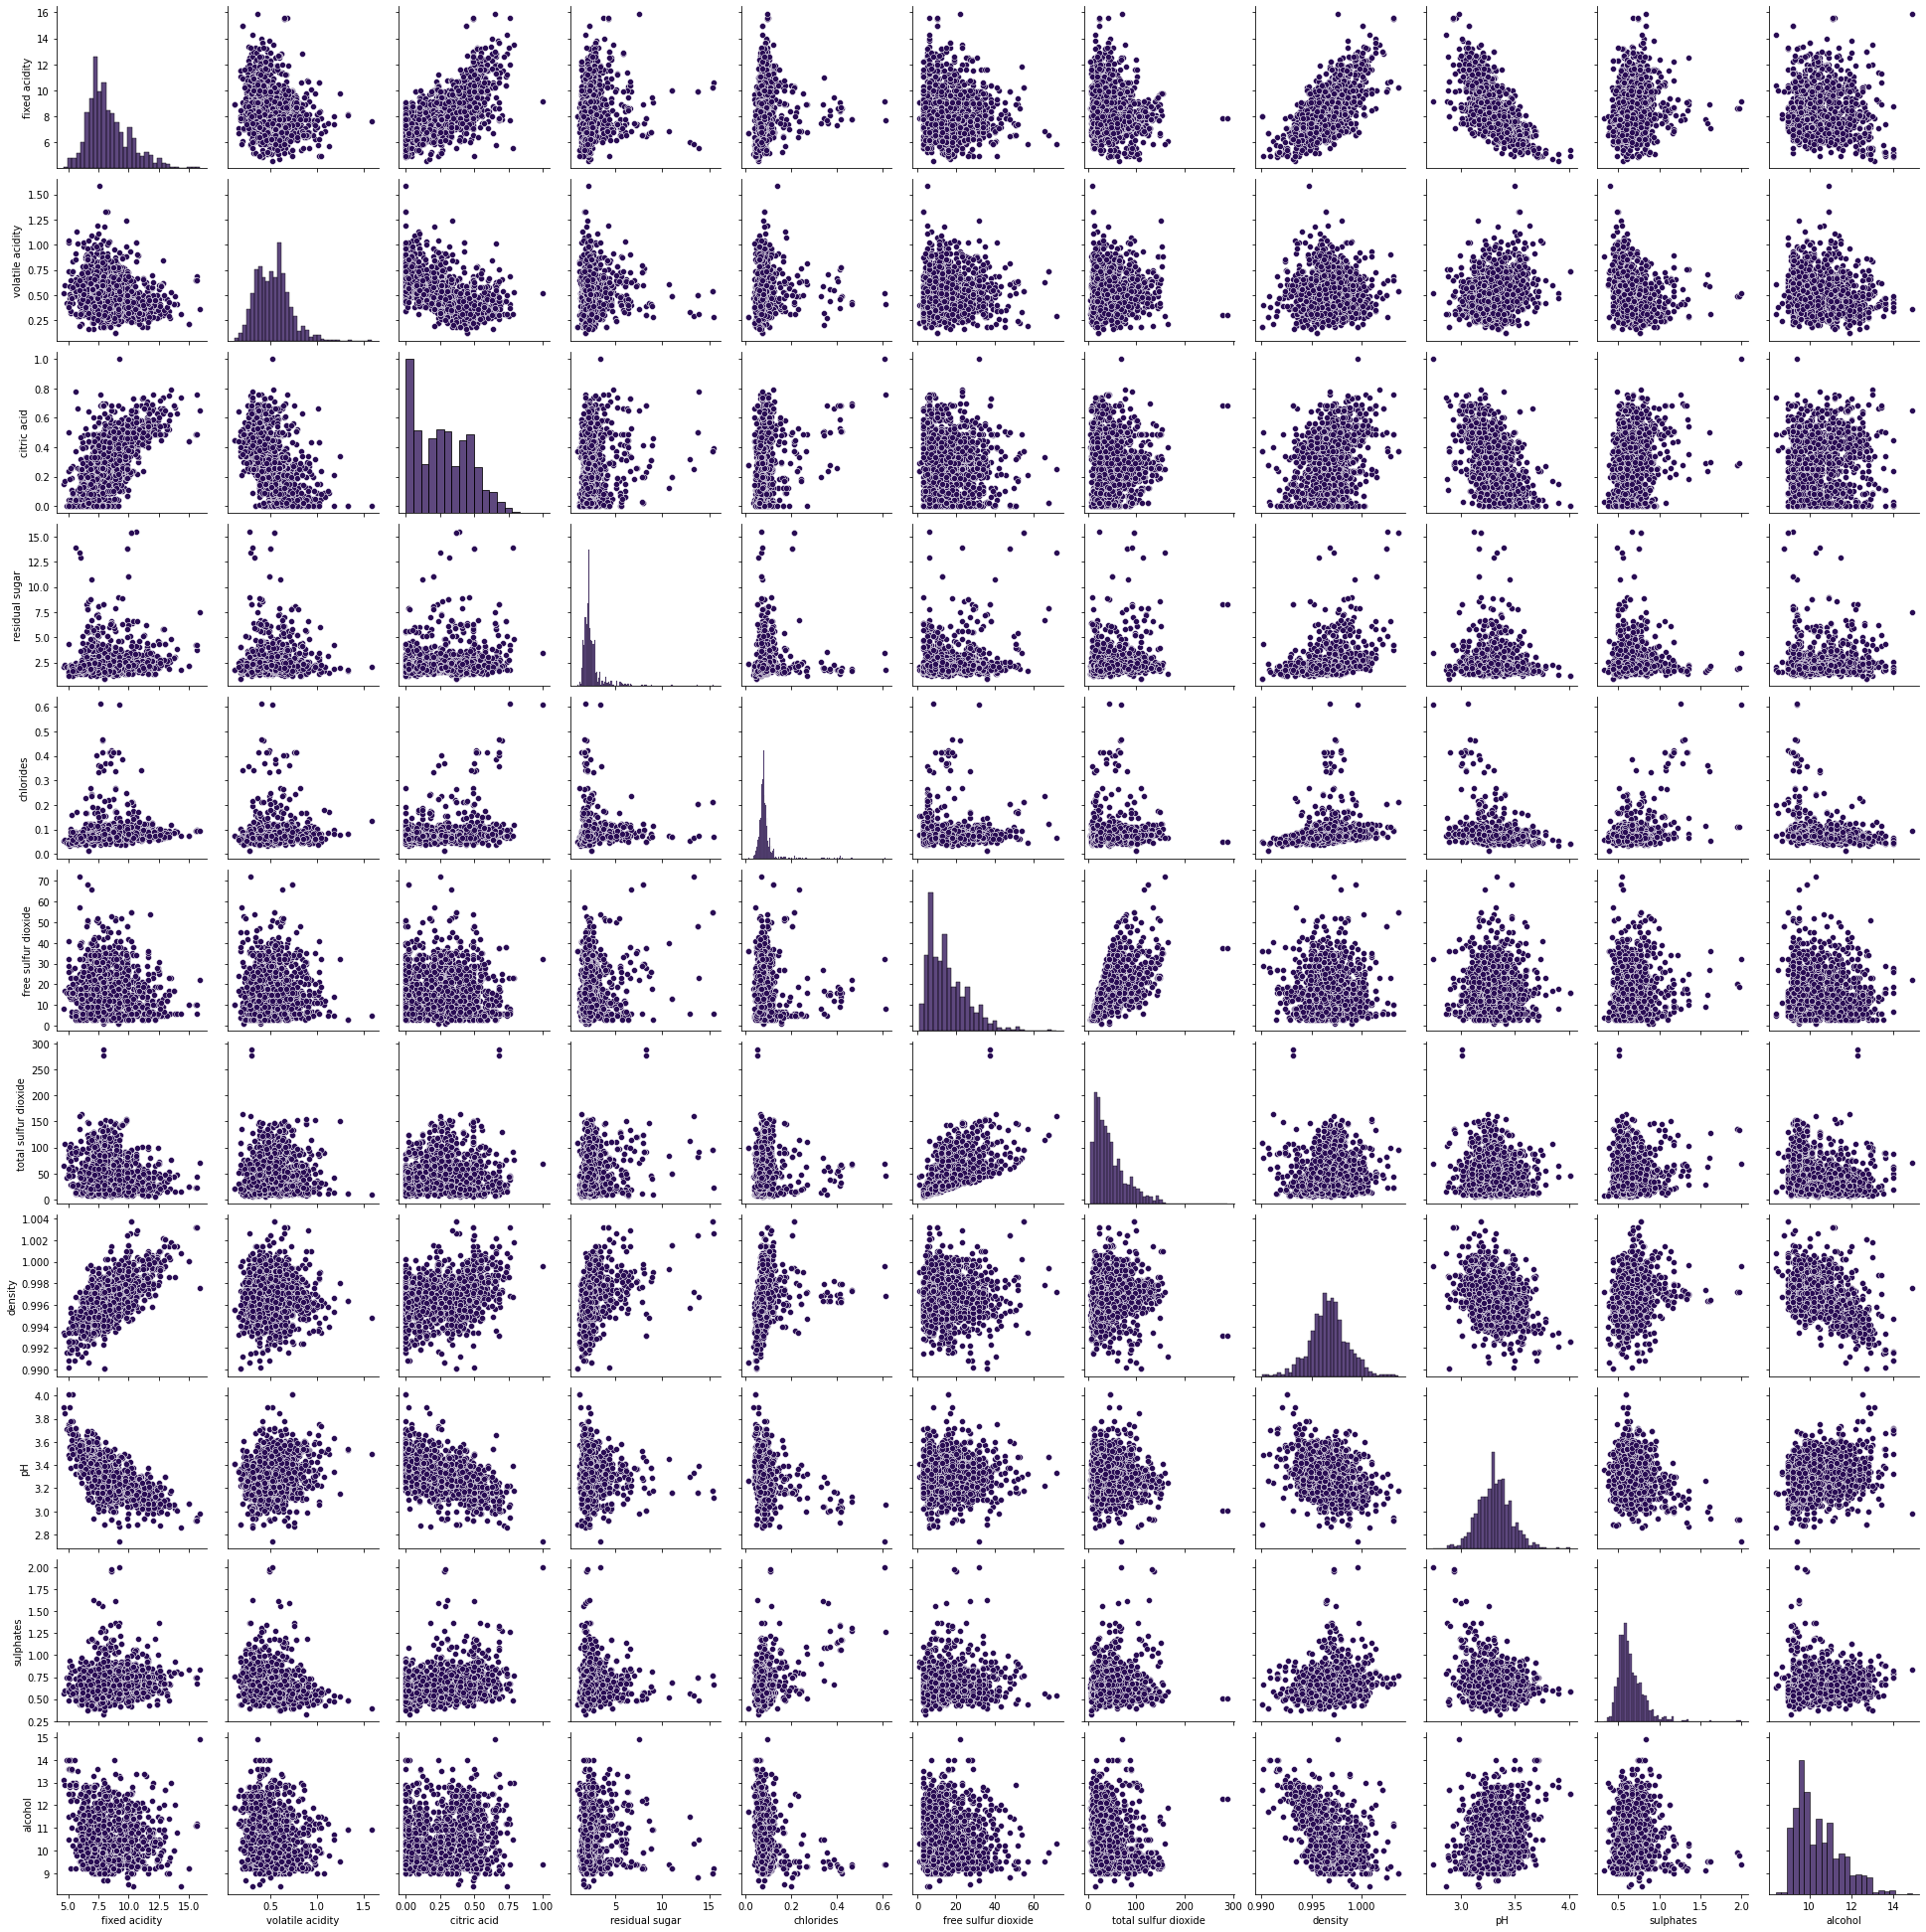

In [ ]:
# check for correlated variables/multicollinearity
sns.pairplot(x)

In [ ]:
# view correlation matrix
x.corr()
# although there is some correlation between the features, none of the features
# appear to be too strongly correlated to one another

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


## EDA observations:
- All of the input features (everything except the quality score) has much higher prevalence of relatively low values for that feature, and the incidence of high feature values tapers off significantly in each of the histograms. Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol all follow this general trend.   
- There are much more wines rated 5 and 6 (681 and 638 respectively) than there are rated anything else. Also the ratings only range from 3 to 8. However, when we split the data into whether a wine is good or bad based on being rated 6 or higher (good) or lower than 6 (bad), the two classes are somewhat balanced (744 in the bad class and 855 in the good class).
- The data will need to be scaled, depending on the type of classifier I decide to use.
- Although there is some correlation between the features, none of the features seem too strongly correlated to each other. Perhaps we can do PCA to shave off the number of features to see if that improves the model. Obviously some columns are bound to be correlated, like more citric acid is associated with a lower pH (-0.54 correlation), which makes sense. Density and fixed acidity seem to be moderately positively correlated as well (0.67 correlation).

# Testing out models

In [ ]:
# separate into training and test sets
# start with a 30-70 test-train split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [ ]:
# now scale the data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

## K-nearest neighbors
I'm trying KNN approach first because if the feature distances play a role in determining whether a wine is good or not, I would like to capture those relationships. From general knowledge about wines, certain aspects such as pH and sulfur content are more ideal around certain values, which is why I'm trying this approach first.

In [ ]:
# first, use the scaled dataset to cross validate for k
cvres=[]
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, x_train_scaled, y_train, cv=5, scoring='accuracy')
    cvres.append(nn['test_score'].mean())

Text(0, 0.5, 'accuracy')

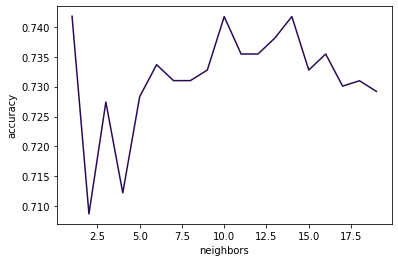

In [ ]:
plt.plot(list(range(1,20)),cvres[0:19])
plt.xlabel('neighbors')
plt.ylabel('accuracy')
# looks like the optimal number of neighbors is 10 for a parsimonious model

In [ ]:
# use KNN with 10 neighbors
mod = KNeighborsClassifier(n_neighbors=10)
nb10=mod.fit(x_train_scaled,y_train)

In [ ]:
# get the confusion matrix
pd.crosstab(y_test,nb10.predict(x_test))

col_0,0,1
target,,
0,206,20
1,214,40


In [ ]:
# get the metrics of the model
print('Accuracy:')
print(accuracy_score(nb10.predict(x_test_scaled), y_test))
print('Precision:')
print(precision_score(nb10.predict(x_test_scaled), y_test))
print('Recall:')
print(recall_score(nb10.predict(x_test_scaled), y_test))
print('F1 score:')
print(f1_score(nb10.predict(x_test_scaled), y_test))

Accuracy:
0.7145833333333333
Precision:
0.7204724409448819
Recall:
0.7349397590361446
F1 score:
0.727634194831014


### Thoughts on KNN:
Although KNN has an okay accuracy score (71%), KNN is inherently limited and cannot seem to improve past this point. Therefore, this might not be the proper model to predict red wine quality given this dataset.

## Bagging Classifier

This bagging model will create many deep decision trees. These trees will overfit and have a high variance. However, this can be solved by fitting separate classifiers on random subsets of the training data, and averaging each of their predictions.


In [ ]:
# first, cross validate the parameters
# CV number of estimators (trees)
num_trees = np.linspace(10,600,10)
bagCV_n = []
for i in num_trees:
    clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=np.int(i),
                            random_state=0, oob_score=True).fit(x_train, y_train)
    bagCV_n.append(clf.oob_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


403.33333333333337


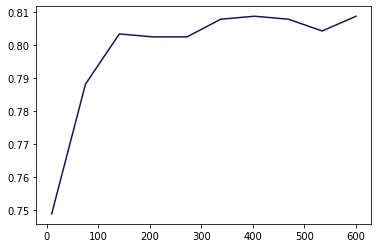

In [ ]:
# plot the CV for bagging classifier
plt.plot(num_trees, bagCV_n)
print(list(num_trees)[bagCV_n.index(max(bagCV_n))])
# peaks at around 400 trees

In [ ]:
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=400,
                        oob_score=True,
                        random_state=0).fit(x_train, y_train)

In [ ]:
# get model metrics
bag_pred = bag.predict(x_test)
print('Accuracy:')
print(accuracy_score(bag_pred, y_test))
print('Precision:')
print(precision_score(bag_pred, y_test))
print('Recall:')
print(recall_score(bag_pred, y_test))
print('F1 score:')
print(f1_score(bag_pred, y_test))

Accuracy:
0.76875
Precision:
0.7992125984251969
Recall:
0.7718631178707225
F1 score:
0.7852998065764023


### Thoughts on bagging:
Overall, bagging showed a substantial improvement over the knn approach. The metrics are all higher. The F1 score is 0.79 and the accuracy is at 76%, which tells me that I might want to explore more tree-based models to fit this data.

## Boosting Classifier
This boosting classifier will grow small, sequential trees which improve on the predictions of the previous trees. Creating small trees prevents overfitting, and although these small trees are weak learners, they combine into a strong learner.

In [ ]:
# first, cross validate all parameters: n_estimators, learning_rate, max_depth
parameters = {'learning_rate' : [0.1, 0.01],
              'n_estimators' : [300, 400, 500],
              'max_depth' : [2,3,4,5]}

In [ ]:
boost_mod = GradientBoostingClassifier(random_state=0)

In [ ]:
# warning: takes a long time to run
bcv = GridSearchCV(boost_mod, parameters)
bcv.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [ ]:
# view cross validation results
bcv_df = pd.DataFrame.from_dict(bcv.cv_results_)
bcv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.538101,0.014039,0.002417,0.000117,0.1,2,300,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.772321,0.785714,0.816964,0.776786,0.784753,0.787308,0.015645,15
1,0.691750,0.006996,0.003381,0.000887,0.1,2,400,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.750000,0.790179,0.821429,0.772321,0.775785,0.781943,0.023570,17
2,0.861891,0.009099,0.003020,0.000108,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.750000,0.794643,0.821429,0.790179,0.789238,0.789098,0.022829,12
3,0.736654,0.008507,0.002851,0.000130,0.1,3,300,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.750000,0.816964,0.821429,0.785714,0.798206,0.794463,0.025694,10
4,0.975520,0.004872,0.003351,0.000131,0.1,3,400,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.750000,0.821429,0.825893,0.794643,0.784753,0.795344,0.027504,8


In [ ]:
# extract CV parameter values that correspond to the best CV score
bcv_df[bcv_df.mean_test_score == bcv_df.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,2.148473,0.011479,0.005723,0.000176,0.1,5,500,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.763393,0.839286,0.821429,0.785714,0.811659,0.804296,0.026797,1


In [ ]:
# build the model using the CV validated parameters
boost = GradientBoostingClassifier(random_state=0,
                                   learning_rate=0.1,
                                   n_estimators=500,
                                   max_depth=5).fit(x_train, y_train)

In [ ]:
# get model metrics
boost_pred = boost.predict(x_test)
print('Accuracy:')
print(accuracy_score(boost_pred, y_test))
print('Precision:')
print(precision_score(boost_pred, y_test))
print('Recall:')
print(recall_score(boost_pred, y_test))
print('F1 score:')
print(f1_score(boost_pred, y_test))

Accuracy:
0.7458333333333333
Precision:
0.7755905511811023
Recall:
0.7519083969465649
F1 score:
0.7635658914728682


### Thoughts on boosting:
Boosting did not perform as well as bagging in any of the metrics listed above. 

## Random Forest Classifier
Random forests are similar to bagging, in that it aggregates trees built on bootstrapped samples of data. Unlike bagging however, every time a split is made in a tree, it is done using a random sample of the available features. This decorrelates the trees and allows weaker signals to communicate, so this way the same, dominant features won't overwhelm all the trees. This random forest will also help to ameliorate having correlated features.

In [ ]:
# cross validate for number of trees
num_trees = np.linspace(10,600,10)
forestCV = []
for i in num_trees:
  rf = RandomForestClassifier(n_estimators=np.int(i),max_features='sqrt',
                              random_state=5, oob_score=True).fit(x_train,y_train)
  forestCV.append(rf.oob_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


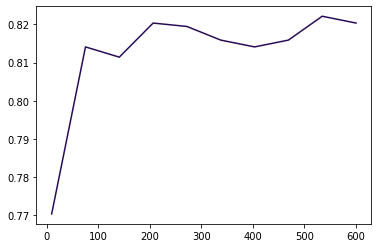

In [ ]:
# plot the CV results
plt.plot(num_trees, forestCV)

In [ ]:
# get the exact value of the number of trees to use
num_trees[forestCV.index(max(forestCV))]


534.4444444444445

In [ ]:
# build the random forest with 534 trees
rf = RandomForestClassifier(n_estimators=534,
                            max_features='sqrt',
                            random_state=0).fit(x_train,y_train)

In [ ]:
# get model metrics
rf_pred = rf.predict(x_test)
print('Accuracy:')
print(accuracy_score(rf_pred, y_test))
print('Precision:')
print(precision_score(rf_pred, y_test))
print('Recall:')
print(recall_score(rf_pred, y_test))
print('F1 score:')
print(f1_score(rf_pred, y_test))

Accuracy:
0.7875
Precision:
0.8070866141732284
Recall:
0.7945736434108527
F1 score:
0.80078125


### Thoughts on random forest:
The random forest classifier worked the best out of the three tree-based methods I tried. With an F1 score of 80%, this classifier does the best job of balancing precision and recall, while preserving a high (78%) accuracy.  
Can this classifier be further tweaked to improve the accuracy?

# Building the final model


## Investigating the random forest classifier
In the previous section, I only cross-validated on the number of trees. Here I will use a grid search to cross-validate other parameters as well.
I will continue using 534 trees, but modify the maximum depth of the trees, the number of features subsampled each time, and whether to use boostrapped to build the trees.

In [ ]:
params = {
    'max_depth' : [None, 2,3,4,5],
    'max_features' : ['sqrt','log2'],
    'bootstrap' : [True, False],
}

In [ ]:
rf1 = RandomForestClassifier(n_estimators = 534,
                             random_state=0)

In [ ]:
# warning: takes a long time to run
rfcv1 = GridSearchCV(rf1, params)
rfcv1.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=534, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [ ]:
rf1_df = pd.DataFrame.from_dict(rfcv1.cv_results_)
rf1_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.382966,0.029323,0.063133,0.003041,True,None,sqrt,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.767857,0.808036,0.852679,0.794643,0.807175,0.806078,0.027453,1
1,1.377167,0.018286,0.060050,0.001869,True,None,log2,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.767857,0.808036,0.852679,0.794643,0.807175,0.806078,0.027453,1
2,0.861424,0.012909,0.059893,0.011775,True,2,sqrt,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.723214,0.732143,0.732143,0.750000,0.766816,0.740863,0.015624,17
3,0.867224,0.005709,0.049835,0.001898,True,2,log2,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.723214,0.732143,0.732143,0.750000,0.766816,0.740863,0.015624,17
4,0.923502,0.008577,0.054366,0.003239,True,3,sqrt,"{'bootstrap': True, 'max_depth': 3, 'max_featu...",0.727679,0.727679,0.763393,0.750000,0.771300,0.748010,0.017943,13


In [ ]:
# extract CV parameter values that correspond to the best CV score
rf1_df[rf1_df.mean_test_score == rf1_df.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.382966,0.029323,0.063133,0.003041,True,None,sqrt,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.767857,0.808036,0.852679,0.794643,0.807175,0.806078,0.027453,1
1,1.377167,0.018286,0.060050,0.001869,True,None,log2,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.767857,0.808036,0.852679,0.794643,0.807175,0.806078,0.027453,1


In [ ]:
rf1_df.rank_test_score.value_counts()


81     6
183    6
159    4
97     4
89     4
      ..
133    2
135    2
137    2
139    2
1      2
Name: rank_test_score, Length: 87, dtype: int64

(-1.0, 11.0)

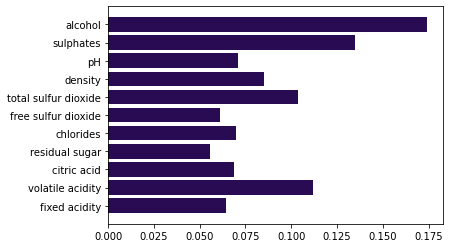

In [ ]:
# look at the feature importances
nfeat = x.shape[1]
plt.barh(np.arange(nfeat), rf.feature_importances_, align='center')
plt.yticks(np.arange(nfeat), list(x.columns))
plt.ylim(-1, nfeat)

## The final model

I decided to use a random forest classifier with 534 trees, and randomly subsampling the square root of the number of features for each tree. It looks like all the features seem to be somewhat important to predict wine quality, so I will keep all these features inside the model.